# Práctica 3: Normalización, Funciones de activación, Early Stopping, Red Neuronal Artificial Multicapa.

## 1.- Preparación de Datos:
  * Utilizar la base de datos de MNIST.
  * Normalizar los datos para escalarlos entre 0 y 1.
  * Balancear los datos para tener el mísmo número de cincos y no cincos.

In [20]:
from keras.datasets import mnist
import numpy as np

def balanced_mnist_set():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  ## Normalización de datos
  x_train = x_train / 255
  x_test = x_test / 255

  # Se obtiene una muestra con igual número de: cincos vs no cincos
  # para el conjunto de entrenamiento y el de test
  idx_y_train_5 = np.where(y_train == 5)[0]
  idx_y_train_n5 = np.where(y_train != 5)[0]
  idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)

  idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
  np.random.shuffle(idx_y_train)

  x_train = x_train[idx_y_train]
  y_train = y_train[idx_y_train]
  #print(x_train.shape)

  idx_y_test_5 = np.where(y_test == 5)[0]
  idx_y_test_n5 = np.where(y_test != 5)[0]
  idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

  idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
  np.random.shuffle(idx_y_test)

  x_test = x_test[idx_y_test]
  y_test = y_test[idx_y_test]
  #print(x_test.shape)

  y_train_binary = (y_train == 5).astype(int)
  y_test_binary = (y_test == 5).astype(int)
  return (x_train, y_train_binary), (x_test, y_test_binary)

# 2.- Implementar una red neuronal multicapa con las siguientes especificaciones:
  * Dos neuronas en la primera capa.
  * Una neurona en la segunda capa (salida).

In [21]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, \
precision_score, recall_score,f1_score, accuracy_score

(x_train, y_train_binary), (x_test, y_test_binary) = balanced_mnist_set()
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])


# 3.- Entrenamiento del modelo.
  * Utilizar Early Stopping monitoreando la métrica que se concidere adecuada.
  * Utilizar los hiperparámetros que se concideren adecuados para *batch_size* y *validation_split*

In [22]:
callback = EarlyStopping(monitor='accuracy', patience=4, restore_best_weights=True)

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_binary, epochs=200, verbose=0,
                    batch_size=400, validation_split=0.2, callbacks=[callback])

# 4.- Evaluación del modelo.
  * Graficar el histórico de *accuracy* y *loss* para le entrenamiento y validación.
  * Mostrar las imágenes de al menos 80 errores de clasificación del modelo.
  * Reportar *accuracy*, *precision*, *recall* y *f1-score* para ambas clases.

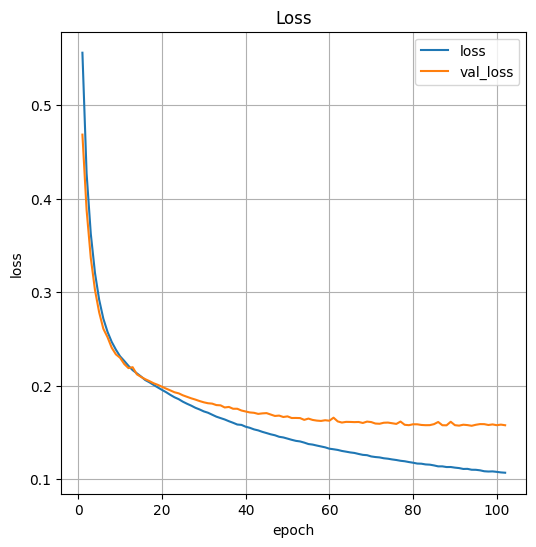

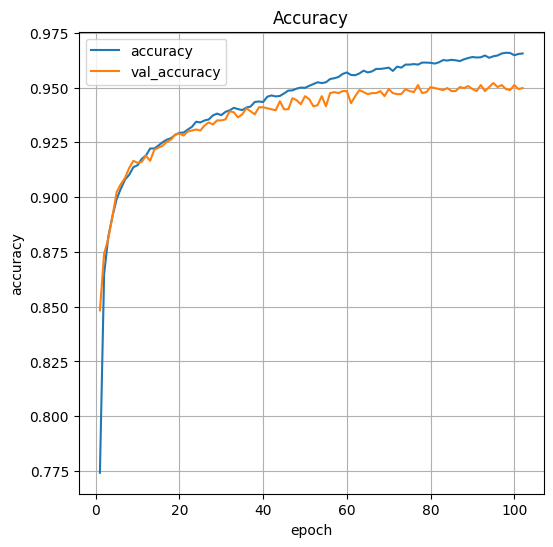

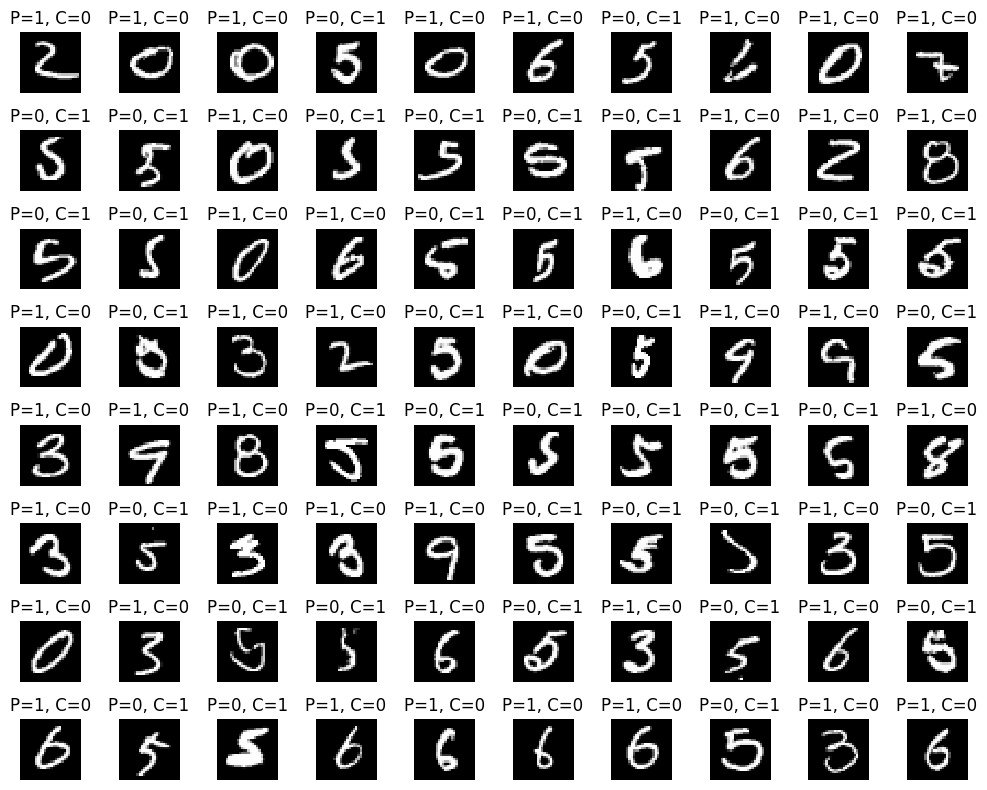


Accuracy  = 0.9489910313901345 
Precision = 0.9464882943143813 
Recall    = 0.9517937219730942 
F1-Score  = 0.9491335941866965 
Precision clase 0 = 0.95152198421646 
Recall clase 0    = 0.9461883408071748 
F1-Score clase 0  = 0.9488476672287802


In [37]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1, len(loss_train) + 1)

plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(epochs, accuracy_train, label='accuracy')
plt.plot(epochs, accuracy_val, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

y_pred = (model.predict(x_test, verbose=0) >= 0.5).astype(int)[:,0]

incorrect_indices = np.nonzero(y_pred != y_test_binary)[0]
incorrect_images = 80 if len(incorrect_indices) >= 80 else len(incorrect_indices)
plt.figure(figsize=(10,8))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, incorrect_images, False)):
    plt.subplot(8,10,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title("P={}, C={}".format(y_pred[incorrect], y_test_binary[incorrect]))
    plt.tick_params(bottom='off',left='off',labelbottom='off',labelleft='off')
plt.tight_layout()
plt.show()

## Se imprimen los valores de precision, recall y f1-score para las clases 0 y 1 con los tests.
print("\nAccuracy  =" , accuracy_score(y_test_binary, y_pred),
      "\nPrecision =" , precision_score(y_test_binary, y_pred),
      "\nRecall    =" , recall_score(y_test_binary, y_pred),
      "\nF1-Score  =" , f1_score(y_test_binary, y_pred),
      "\nPrecision clase 0 =" , precision_score(y_test_binary, y_pred, pos_label=0),
      "\nRecall clase 0    =" , recall_score(y_test_binary, y_pred, pos_label=0),
      "\nF1-Score clase 0  =" , f1_score(y_test_binary, y_pred, pos_label=0))

# 5.- Punto extra: Grafica la curva ROC de tu modelo, obén el área sobre la curva ROC (qué les indica este valor), y determina el umbral que usarías (justifica tu respuesta).

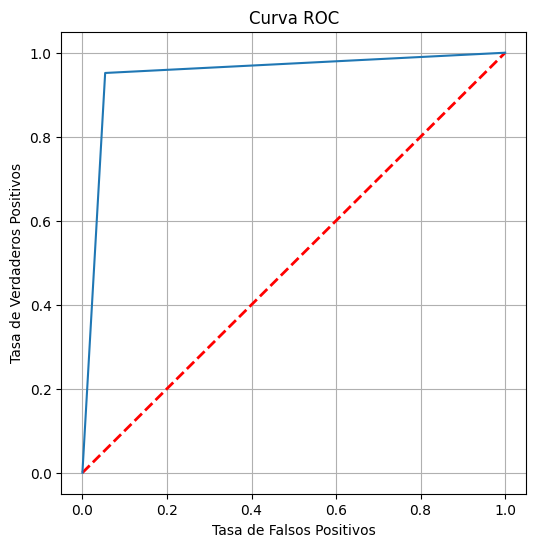

AUC = 0.9489910313901345


In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_binary, y_pred)

plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr)
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.grid(True)
plt.show()

roc_auc = auc(fpr, tpr)

print("AUC =", roc_auc)